In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from script.machine_learning_model import model_run, cvmodel, data_load, plot_importance, one_shot_plot, crossvalid
import os 
os.makedirs("out", exist_ok = True)
model_types = ["conv", "prop", "prop2", "prop3"]

import sklearn
import xgboost
import shap
import random
random.seed(1126)
np.random.seed(1126)

print("xgboost vesion:" + xgboost.__version__)
print("shap vesion:" + shap.__version__)
print("numpy vesion:" + np.__version__)
print("pandas vesion:" + pd.__version__)
print("sklearn version" + sklearn.__version__)

xgboost vesion:1.2.1
shap vesion:0.36.0
numpy vesion:1.18.5
pandas vesion:1.0.5
sklearn version0.23.1


In [2]:
!python script/convert.py

In [3]:
!python script/EDA.py

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0, flags=flags)


In [9]:
ret = {}
rmse = {}
cvf = KFold(n_splits = 10 ,random_state =1126, shuffle = True)
for model_type in model_types:
    ret, rmse = model_run(ret, rmse, model_type, cvf)

----- Conventional model -----
RMSE 1.503 (sd: 0.019, min:1.471, max:1.532, det:0.952) ... train
RMSE 3.664 (sd: 0.230, min:3.282, max:4.024, det:0.713) ... test
RMSE 0.761 (sd: 0.031, min:0.704, max:0.800, det:0.988) ... train
RMSE 3.643 (sd: 0.197, min:3.354, max:4.089, det:0.716) ... test
[19:48:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { rondom_state } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:55:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { rondom_state } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip thro

RMSE 1.765 (sd: 0.264, min:1.334, max:2.224, det:0.932) ... train
RMSE 3.606 (sd: 0.280, min:3.247, max:4.225, det:0.722) ... test
----- Proposed model 2 -----
RMSE 1.517 (sd: 0.019, min:1.483, max:1.541, det:0.951) ... train
RMSE 3.698 (sd: 0.291, min:3.364, max:4.214, det:0.708) ... test
RMSE 0.761 (sd: 0.031, min:0.704, max:0.800, det:0.988) ... train
RMSE 3.570 (sd: 0.281, min:3.137, max:4.189, det:0.727) ... test
[23:16:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { rondom_state } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:24:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { rondom_state } might not be used.

  This may not be accurate due to som

[01:17:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { rondom_state } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


RMSE 1.265 (sd: 0.167, min:0.989, max:1.653, det:0.965) ... train
RMSE 3.564 (sd: 0.273, min:3.210, max:4.043, det:0.728) ... test


In [10]:


errors =pd.DataFrame()
for j in ["conv", "prop", "prop2", "prop3"]:
    for i in ["RFR", "ETR", "XGB"]:
        a =ret[f"{i}_{j}"]["trn_mean"]
        b = ret[f"{i}_{j}"]["trn_std"]
        errors.at["train",f"{i}_{j}"] = f"{a : .2f} ({b: .2f})"
        a =ret[f"{i}_{j}"]["tes_mean"]
        b = ret[f"{i}_{j}"]["tes_std"]
        errors.at["test", f"{i}_{j}"] = f"{a : .2f} ({b: .2f})"
        a  = ret[f"{i}_{j}"]["tes_r2"]
        errors.at["r2", f"{i}_{j}"] = f"{a : .3f}"
errors.to_csv("out/errors.csv")
best_reg = min(rmse).split("_")[0]
best_reg

'ETR'

In [11]:
feat, target = data_load("prop3", option = True)

model = cvmodel("RFR")
ret[f"RFR_{model_type}"], rmse[f"RFR_{model_type}"] = crossvalid(
    feat, target, model, cvf)

model = cvmodel("ETR")
ret[f"ETR_{model_type}"], rmse[f"ETR_{model_type}"] = crossvalid(
    feat, target, model, cvf)

model = cvmodel("XGB")
ret[f"XGB_{model_type}"], rmse[f"XGB_{model_type}"] = crossvalid(
    feat, target, model, cvf)

RMSE 1.661 (sd: 0.015, min:1.628, max:1.682, det:0.938) ... train
RMSE 4.450 (sd: 0.335, min:3.900, max:5.214, det:0.547) ... test
RMSE 0.166 (sd: 0.021, min:0.134, max:0.184, det:0.999) ... train
RMSE 4.485 (sd: 0.348, min:4.094, max:5.336, det:0.540) ... test
[01:20:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { rondom_state } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:22:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { rondom_state } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please

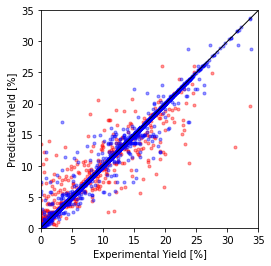

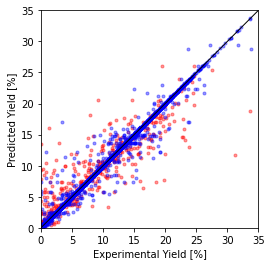

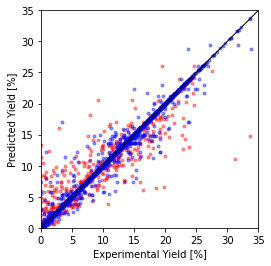

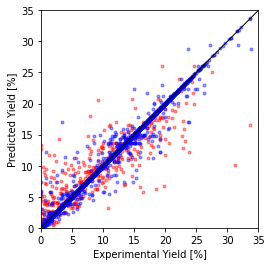

In [12]:
best_reg = "ETR"
feat, target = data_load("conv", option = True)
model = cvmodel(best_reg)
model.fit(feat, target)
model = model.best_estimator_
plot_importance(model, feat.columns, 20, fname = "Figure_5_1")

feat, target = data_load("conv")
model = cvmodel(best_reg)
model.fit(feat, target)
model = model.best_estimator_
one_shot_plot(feat, target,model, fname = "Figure_4_1")
plot_importance(model, feat.columns, 20, fname = "Figure_5_2")

feat, target = data_load("prop", option = True)
model = cvmodel(best_reg)
model.fit(feat, target)
model = model.best_estimator_
plot_importance(model, feat.columns, 20, fname = "Figure_S5_1")

feat, target = data_load("prop")
model = cvmodel(best_reg)
model.fit(feat, target)
model = model.best_estimator_
one_shot_plot(feat, target,model, fname = "Figure_4_2")
plot_importance(model, feat.columns, 20, fname = "Figure_S5_2")

feat, target = data_load("prop2", option = True)
model = cvmodel(best_reg)
model.fit(feat, target)
model = model.best_estimator_
plot_importance(model, feat.columns, 20, fname = "Figure_S6_1")

feat, target = data_load("prop2")
model = cvmodel(best_reg)
model.fit(feat, target)
model = model.best_estimator_
one_shot_plot(feat, target, model, fname = "Figure_4_3")
plot_importance(model, feat.columns, 20, fname = "Figure_S6_2")

feat, target = data_load("prop3")
model = cvmodel(best_reg)
model.fit(feat, target)
model = model.best_estimator_
one_shot_plot(feat, target, model, fname = "Figure_4_4")

In [13]:
                                                                       a

0.7280652753480871

In [11]:
 n nb n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n n

SyntaxError: invalid syntax (<ipython-input-11-26c88209b268>, line 1)